<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Setup-Notebook" data-toc-modified-id="Setup-Notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup Notebook</a></span></li><li><span><a href="#Download-Data" data-toc-modified-id="Download-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Download Data</a></span><ul class="toc-item"><li><span><a href="#Download-&amp;-Shell-Script-to-Download-Census-Data" data-toc-modified-id="Download-&amp;-Shell-Script-to-Download-Census-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Download &amp; Shell Script to Download Census Data</a></span></li><li><span><a href="#Unzip-Census-Data" data-toc-modified-id="Unzip-Census-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Unzip Census Data</a></span></li><li><span><a href="#Open-Census-Data-as-Pandas-Dataframes" data-toc-modified-id="Open-Census-Data-as-Pandas-Dataframes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Open Census Data as Pandas Dataframes</a></span></li><li><span><a href="#Drop-Unnecessary-Dataframe-Columns-and-Merge" data-toc-modified-id="Drop-Unnecessary-Dataframe-Columns-and-Merge-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Drop Unnecessary Dataframe Columns and Merge</a></span></li><li><span><a href="#Get-NYC-Zipcode-Shapefiles" data-toc-modified-id="Get-NYC-Zipcode-Shapefiles-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Get NYC Zipcode Shapefiles</a></span></li><li><span><a href="#Select-Data-For-Only-NYC" data-toc-modified-id="Select-Data-For-Only-NYC-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Select Data For Only NYC</a></span></li></ul></li><li><span><a href="#Cluster-Number-of-Establishments-Using-K-Means" data-toc-modified-id="Cluster-Number-of-Establishments-Using-K-Means-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cluster Number of Establishments Using K Means</a></span></li><li><span><a href="#Plot-the-Clusters" data-toc-modified-id="Plot-the-Clusters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot the Clusters</a></span></li><li><span><a href="#Cluster-Number-of-Establishments-Using-Another-Algorithm" data-toc-modified-id="Cluster-Number-of-Establishments-Using-Another-Algorithm-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cluster Number of Establishments Using Another Algorithm</a></span></li><li><span><a href="#Overlay-Clusters-Onto-Map-of-NYC" data-toc-modified-id="Overlay-Clusters-Onto-Map-of-NYC-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Overlay Clusters Onto Map of NYC</a></span></li><li><span><a href="#Compare-Algorithms" data-toc-modified-id="Compare-Algorithms-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Compare Algorithms</a></span></li><li><span><a href="#Tentative-Interpretation" data-toc-modified-id="Tentative-Interpretation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Tentative Interpretation</a></span></li></ul></div>

## Setup Notebook

In [292]:
from __future__ import print_function
import numpy as np
import pandas as pd
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import os, urllib, zipfile
import sklearn.cluster
from sklearn import mixture
from PIL import Image
import scipy
from scipy.cluster.vq import kmeans2
from mpl_toolkits.mplot3d import Axes3D
import time
import pylab as pl
from IPython.display import display, clear_output
import time

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


## Download Data

### Download & Shell Script to Download Census Data

In [8]:
url = 'https://s3.amazonaws.com/aws-website-seanandrewchen-repository-40es3/pui2017_data/download.sh'
fileName = 'download.sh'
urllib.request.urlretrieve(url, fileName);

In [10]:
os.system('chmod +x download.sh')
os.system('./download.sh');

### Unzip Census Data

In [11]:
url = 'https://raw.githubusercontent.com/python/cpython/2.7/Lib/zipfile.py'
fileName = 'zipfile.py'
urllib.request.urlretrieve(url, fileName);

In [320]:
import zipfile

baseFile = 'zbpXtotals.zip'
years = ['94', '95', '96', '97', '98', '99', '00', '01', '02', '03', '04', 
                           '05', '06', '07', '08', '09', '10', '11', '12', '13', '14']

for i, j in enumerate(years):
    fileName = baseFile.replace('X', j)
    zf = zipfile.ZipFile(fileName)
    zf.extractall(os.getcwd())
    zf.close()

### Open Census Data as Pandas Dataframes

In [321]:
dfList =[]
txtFile = 'zbpXtotals.txt'

for i, j in enumerate(years):
    fileName = txtFile.replace('X', j)
    df = pd.read_csv(fileName)
    df['YEAR'] = int(j)
    dfList.append(df)

### Drop Unnecessary Dataframe Columns and Merge

In [322]:
for i in range(len(dfList)):
    print(dfList[i].columns)

Index(['zip', 'name', 'empflag', 'emp', 'qp1', 'ap', 'est', 'YEAR'], dtype='object')
Index(['zip', 'name', 'empflag', 'emp', 'qp1', 'ap', 'est', 'YEAR'], dtype='object')
Index(['zip', 'name', 'empflag', 'emp', 'qp1', 'ap', 'est', 'YEAR'], dtype='object')
Index(['zip', 'name', 'empflag', 'emp', 'qp1', 'ap', 'est', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['zip', 'name', 'empflag', 'emp', 'qp1', 'ap', 'est', 'YEAR'], dtype='object')
Index(['zip', 'name', 'empflag', 'emp', 'qp1', 'ap', 'est', 'YEAR'], dtype='object')
Index(['zip', 'name', 'empflag', 'emp', 'qp1', 'ap', 'est', 'YEAR

In [323]:
for i in range(0,13):
    dfList[i].columns = ['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR']

In [324]:
businessData0 = pd.concat(dfList[:13])
businessData1 = pd.concat(dfList[13:16])
businessData2 = pd.concat(dfList[16:])

The meaning of each column can be found [here](https://www2.census.gov/programs-surveys/cbp/technical-documentation/records-layouts/noise-layout/zip_totals_layout10.txt).

- ZIP is ZIP Code
- NAME is ZIP Code Name
- EMPFLAG is Data Suppression Flag
- EMP_NF is Total Mid-March Employees Noise Flag 
- EMP is Total Mid-March Employees with Noise
- QP1_NF is Total First Quarter Payroll Noise Flag
- QP1 is Total First Quarter Payroll with Noise                          
- AP_NF is Total Annual Payroll Noise Flag
- AP is Total Annual Payroll with Noise
- EST is Total Number of Establishments
- CITY is ZIP City Name
- STABBR is ZIP State Abbreviation
- CTY_NAME is ZIP County Name

We only need ZIP Code and Total Number of Establishments

In [339]:
dropColumns0 = ['NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'CITY', 'STATE'] 
dropColumns1 = ['name', 'empflag', 'emp_nf', 'emp', 'qp1_nf', 'qp1', 'ap_nf', 'ap'] 
dropColumns2 = ['name', 'empflag', 'emp_nf', 'emp', 'qp1_nf', 'qp1', 'ap_nf', 'ap', 'city', 'stabbr', 'cty_name']

In [340]:
businessData0 = businessData0.drop(dropColumns0, axis=1)
businessData1 = businessData1.drop(dropColumns1, axis=1)
businessData2 = businessData2.drop(dropColumns2, axis=1)

In [344]:
businessData0.columns = ['ZIP', 'EST', 'YEAR']
businessData1.columns = ['ZIP', 'EST', 'YEAR']
businessData2.columns = ['ZIP', 'EST', 'YEAR']

In [345]:
businessData0.head()

,ZIP,EST,YEAR
0,1001,439,94
1,1002,450,94
2,1003,10,94
3,1004,47,94
4,1005,92,94


In [346]:
businessData1.head()

,ZIP,EST,YEAR
0,501,5,7
1,1001,503,7
2,1002,596,7
3,1003,16,7
4,1004,20,7


In [347]:
businessData2.head()

,ZIP,EST,YEAR
0,501,2,10
1,1001,448,10
2,1002,570,10
3,1003,16,10
4,1004,21,10


In [348]:
dataframesList = [businessData0, businessData1, businessData2]
businessData = pd.concat(dataframesList)

In [349]:
businessData.head()

,ZIP,EST,YEAR
0,1001,439,94
1,1002,450,94
2,1003,10,94
3,1004,47,94
4,1005,92,94


### Get NYC Zipcode Shapefiles

In [354]:
url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
fileName = 'ZIP_CODE_040114'
urllib.request.urlretrieve(url, fileName);

zf = zipfile.ZipFile(fileName)
zf.extractall(os.getcwd())
zf.close()

In [355]:
zipCodes = gpd.read_file('ZIP_CODE_040114.shp')

In [356]:
zipcodesList = zipCodes.ZIPCODE.unique()
zipcodesList = zipcodesList.astype('int')

### Select Data For Only NYC

In [357]:
zipcodesList

array([11436, 11213, 11212, 11225, 11218, 11226, 11219, 11210, 11230,
       11204, 10471, 10470, 10466, 10467, 10463, 10475, 10464, 10469,
       10468, 10458, 10034, 10033, 10462, 10040, 10453, 10465, 10461,
       10457, 10460, 10032, 10452, 10456, 10472, 10031, 10039, 10459,
       10451, 10473, 10030, 10027, 10474, 10455, 10037, 10024, 10454,
       10026, 10035, 10048, 10025, 11357, 10029,    83, 11356, 11359,
       11360, 11105, 10128, 10023, 11363, 10028, 11354, 11102, 11370,
       10021, 11358, 11362, 10044, 11369, 11103, 11106, 11368, 11377,
       11355, 11101, 11364, 10018, 10020, 11005, 10017, 10001, 10011,
       10016, 11104, 11109, 10010, 11367, 10014, 10003, 11222, 10002,
       11378, 10009, 10012, 10013, 10007, 11237, 11385, 10038, 11206,
       10006, 11412, 10005, 11251, 10004, 11411, 11201, 11205, 11208,
       11207, 11413, 11217, 11238, 11231, 11422, 11420, 11417, 11215,
       11232, 11430, 11203, 11239, 11236, 11220, 10301, 10303, 11234,
       10302, 11693,

In [358]:
businessData = businessData[businessData.ZIP.isin(zipcodesList)]

## Cluster Number of Establishments Using K Means
Cluster the number of establishments time series with K-means in **a few** clusters. (As discussed there is no real good, sound way to decide what a good number is here. Try a few options, keeping in mind a few is more than a couple, but it is recommended that you stay within the single digit numbers.)

In [366]:
businessData.loc[businessData.YEAR <= 14, 'YEAR'] += 2000
businessData.loc[businessData.YEAR <= 99, 'YEAR'] += 1900

In [388]:
yearsData = businessData.pivot(index='ZIP', columns='YEAR', values='EST')
yearsData.head()

YEAR,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ZIP,,,,,,,,,,,,,,,,,,,,,
10001,6999.0,7088.0,7075.0,7154.0,7254.0,7233.0,7317.0,7188.0,7141.0,7084.0,...,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7227.0,7235.0,7273.0,7369.0
10002,1784.0,1819.0,1919.0,2049.0,2003.0,2085.0,2277.0,2543.0,2269.0,2402.0,...,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2912.0,2954.0,2988.0,2972.0
10003,3256.0,3377.0,3417.0,3535.0,3649.0,3659.0,3683.0,3602.0,3616.0,3704.0,...,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4159.0,4214.0,4277.0,4333.0
10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,1294.0,1247.0,1253.0,1252.0,...,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1404.0,1442.0,1479.0,1554.0
10005,1076.0,1109.0,1216.0,1227.0,1270.0,1242.0,1287.0,1249.0,1244.0,1200.0,...,1214.0,1259.0,1273.0,1291.0,1274.0,1266.0,1301.0,1273.0,1296.0,1321.0


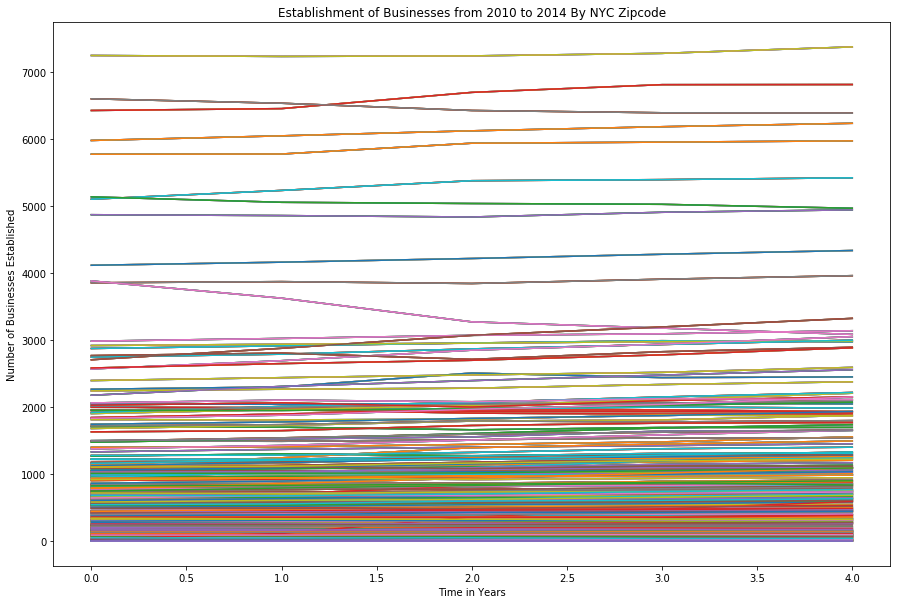

In [360]:
plt.figure(figsize=(15,10))

for index, row in yearsData.iterrows():
    plt.plot(yearsData.values)
    
plt.title('Establishment of Businesses from 2010 to 2014 By NYC Zipcode')
plt.xlabel('Time in Years')
plt.ylabel('Number of Businesses Established')
#plt.legend(yearsData.columns)
plt.show;

**Figure 3.1**: Plot number of business establishments for each NYC zipcode from 2010 to 2014. Each different color line represents a different zipcode. A legend was not included because it does not add any actual value and is visually obtrusive. 

In [446]:
arrayData = yearsData.as_matrix()
arrayData[isnan(arrayData)] = 0

In [447]:
means = np.mean(arrayData, axis=1)
stds = np.std(arrayData, axis=1)

for index, value in np.ndenumerate(arrayData):
    arrayData[index] = (value - means[index[1]]) / stds[index[1]]

In [448]:
flippedData = np.swapaxes(arrayData, 1, 0)
flippedData.shape

(21, 245)

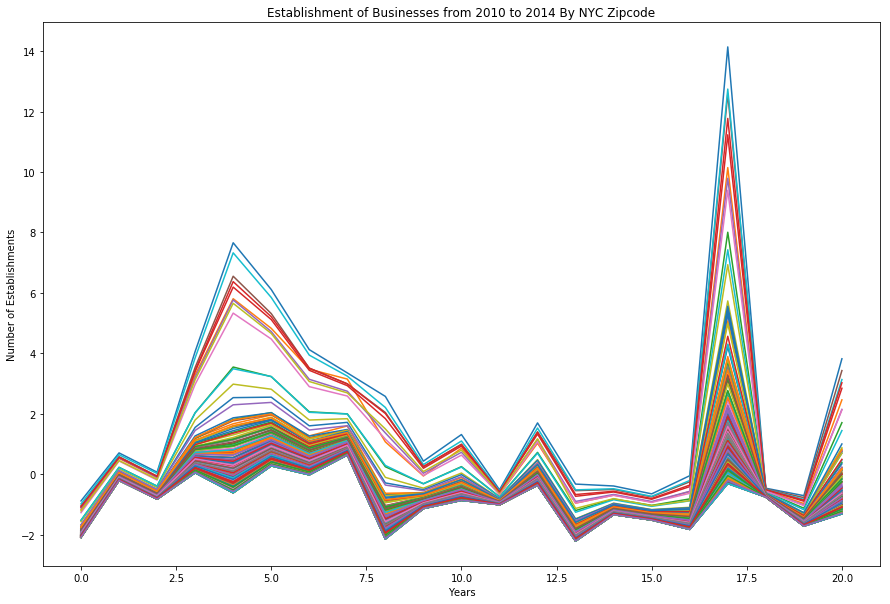

In [450]:
plt.figure(figsize=(15,10))
plt.plot(flippedData);
plt.title("Establishment of Businesses from 2010 to 2014 By NYC Zipcode")
#plt.ylim(-.5, 1)
#plt.xlim(0,20)
plt.xlabel("Years")
plt.ylabel("Number of Establishments");

**Figure 3.2:** Plot of number of business establishments for each NYC zipcode from 2014 to 2014

In [583]:
kmeans = sklearn.cluster.KMeans(n_clusters=5)
labels = kmeans.fit_predict(arrayData)

labels

array([4, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 1, 3, 4, 1, 4, 1, 2, 1, 4, 3, 3, 3,
       0, 2, 3, 2, 0, 2, 2, 2, 2, 2, 4, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 3, 0, 3, 2, 2, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 3, 3, 0, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 0, 3, 3,
       2, 2, 2, 0, 0, 0, 3, 3, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0,
       0, 3, 3, 2, 3, 3, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [494]:
flippedLabels = labels.reshape((1, 245))
clusteredData = numpy.append(flippedData, flippedLabels, axis = 0)
clusteredData.shape

In [498]:
clusteredData = np.swapaxes(clusteredData, 1, 0)

In [521]:
clusteredData = pd.DataFrame(clusteredData)
clusteredData

cluster0 = clusteredData.loc[clusteredData[21]==0]
cluster1 = clusteredData.loc[clusteredData[21]==1]
cluster2 = clusteredData.loc[clusteredData[21]==2]
cluster3 = clusteredData.loc[clusteredData[21]==3]
cluster4 = clusteredData.loc[clusteredData[21]==4]

## Plot the Clusters
Plot the cluster centers. (If you used K means, those are the means of the clusters). You can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).

In [559]:
cluster0Mean = cluster0.mean(axis=0)
cluster0Mean = cluster0Mean[:-1]
cluster0Mean

cluster0 = cluster0.iloc[:, :-1]

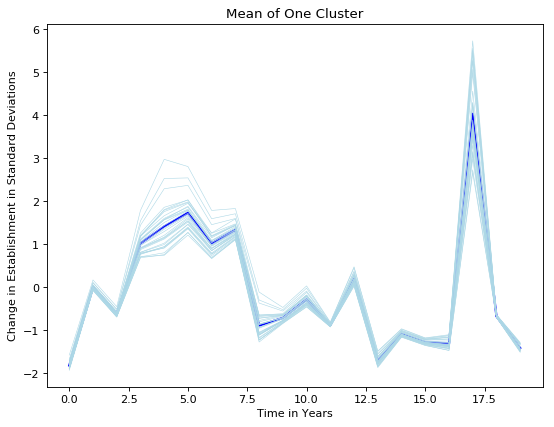

In [569]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(cluster0Mean, color="blue", linewidth=2.0, linestyle="-");
for index in range(0,31):
    plt.plot(cluster0.iloc[index, :], color="lightblue", linewidth=.5, linestyle="-");
plt.title("Mean of One Cluster")
plt.ylabel("Change in Establishment in Standard Deviations")
plt.xlabel("Time in Years");

**Figure 4.1:** Plot of the mean of the first cluster and members of the first clusters

In [563]:
cluster1Mean = cluster1.mean(axis=0)
cluster1Mean = cluster1Mean[:-1]
cluster1Mean

cluster1 = cluster1.iloc[:, :-1]

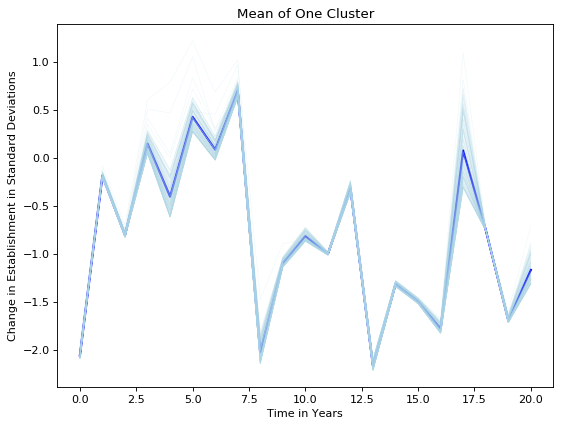

In [572]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(cluster1Mean, color="blue", linewidth=2.0, linestyle="-");
for index in range(0,118):
    plt.plot(cluster1.iloc[index, :], color="lightblue", linewidth=.5, linestyle="-", alpha=0.2);
plt.title("Mean of One Cluster")
plt.ylabel("Change in Establishment in Standard Deviations")
plt.xlabel("Time in Years");

**Figure 4.2:** Plot of the mean of the second cluster and members of the second clusters

In [562]:
cluster2Mean = cluster2.mean(axis=0)
cluster2Mean = cluster2Mean[:-1]
cluster2Mean

cluster2 = cluster2.iloc[:, :-1]

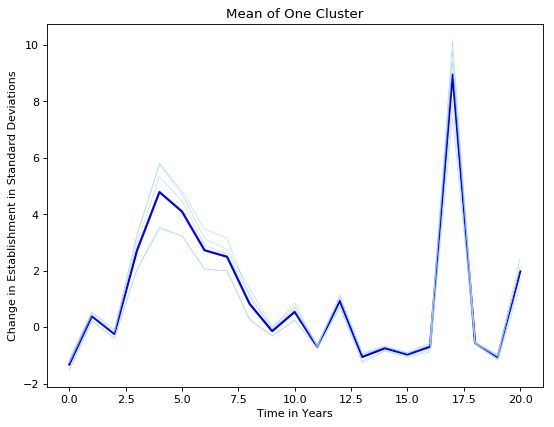

In [574]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(cluster2Mean, color="blue", linewidth=2.0, linestyle="-");
for index in range(0,5):
    plt.plot(cluster2.iloc[index, :], color="lightblue", linewidth=.5, linestyle="-");
plt.title("Mean of One Cluster")
plt.ylabel("Change in Establishment in Standard Deviations")
plt.xlabel("Time in Years");

**Figure 4.3:** Plot of the mean of the third cluster and members of the third clusters

In [561]:
cluster3Mean = cluster3.mean(axis=0)
cluster3Mean = cluster3Mean[:-1]
cluster3Mean

cluster3 = cluster3.iloc[:, :-1]

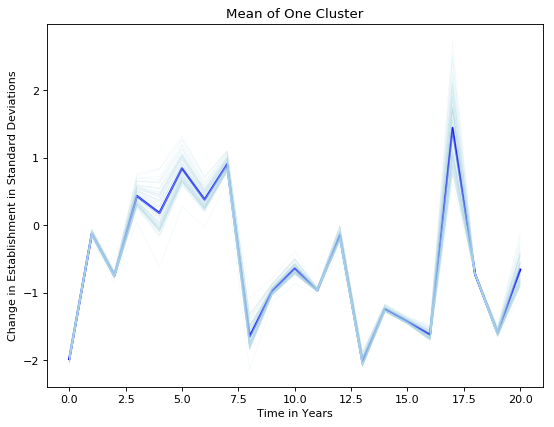

In [577]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(cluster3Mean, color="blue", linewidth=2.0, linestyle="-");
for index in range(0,81):
    plt.plot(cluster3.iloc[index, :], color="lightblue", linewidth=.5, linestyle="-", alpha=.2);
plt.title("Mean of One Cluster")
plt.ylabel("Change in Establishment in Standard Deviations")
plt.xlabel("Time in Years");

**Figure 4.4:** Plot of the mean of the fourth cluster and members of the fourth clusters

In [560]:
cluster4Mean = cluster4.mean(axis=0)
cluster4Mean = cluster4Mean[:-1]
cluster4Mean

cluster4 = cluster4.iloc[:, :-1]

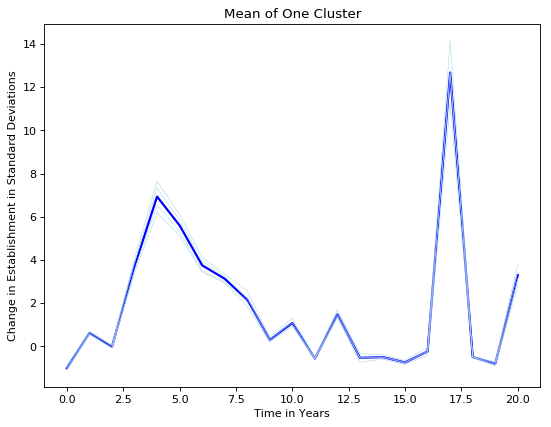

In [579]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(cluster4Mean, color="blue", linewidth=2.0, linestyle="-");
for index in range(0,4):
    plt.plot(cluster4.iloc[index, :], color="lightblue", linewidth=.5, linestyle="-");
plt.title("Mean of One Cluster")
plt.ylabel("Change in Establishment in Standard Deviations")
plt.xlabel("Time in Years");

**Figure 4.5:** Plot of the mean of the fifth cluster and members of the fifth clusters

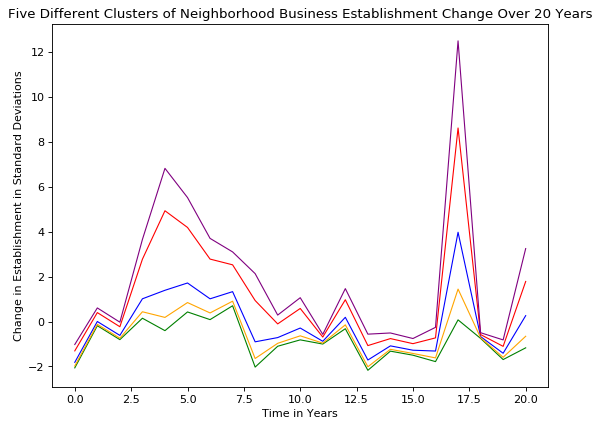

In [544]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(cluster0Mean, color="blue", linewidth=1.0, linestyle="-");
plt.plot(cluster1Mean, color="green", linewidth=1.0, linestyle="-");
plt.plot(cluster2Mean, color="red", linewidth=1.0, linestyle="-");
plt.plot(cluster3Mean, color="orange", linewidth=1.0, linestyle="-");
plt.plot(cluster4Mean, color="purple", linewidth=1.0, linestyle="-");
plt.title("Five Different Clusters of Neighborhood Business Establishment Change Over 20 Years")
plt.ylabel("Change in Establishment in Standard Deviations")
plt.xlabel("Time in Years");

**Figure 4.1:** Plot of the 5 different clusters of neighborhood business establishment change over twenty years. 

## Cluster Number of Establishments Using Another Algorithm
Use another clustering algorithm (of your choice).

In [585]:
agglom = sklearn.cluster.AgglomerativeClustering(n_clusters=5)
labels1 = agglom.fit_predict(arrayData)

In [586]:
labels1

array([4, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 4, 2, 4, 2, 1, 2, 4, 0, 0, 0,
       3, 1, 0, 1, 3, 1, 1, 1, 1, 1, 4, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1,
       3, 1, 3, 3, 0, 3, 0, 1, 1, 1, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 3, 0, 0,
       1, 1, 1, 3, 3, 3, 0, 0, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3,
       3, 0, 0, 1, 0, 0, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3])

In [587]:
labels

array([4, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 1, 3, 4, 1, 4, 1, 2, 1, 4, 3, 3, 3,
       0, 2, 3, 2, 0, 2, 2, 2, 2, 2, 4, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 3, 0, 3, 2, 2, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 3, 3, 0, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 0, 3, 3,
       2, 2, 2, 0, 0, 0, 3, 3, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0,
       0, 3, 3, 2, 3, 3, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## Overlay Clusters Onto Map of NYC
Overlay your data on a NYC map. You can use shapefiles for the zip codes and different colors for different clusters.

In [ ]:
pl.figure(figsize=(10, 6))
pl.scatter(cluster_centroids[:,0]*coordinates.std(axis=0)[0], cluster_centroids[:,1]*coordinates.std(axis=0)[1], c='r', s=100)
pl.scatter(coordinates[:,0],coordinates[:,1], c='k', alpha=.3, s=10)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("K-means clustering, %d culsters"%nk, fontsize=18)
m = Basemap(projection='cyl')
m.drawcoastlines();

## Compare Algorithms
Compare the results of the 2 algorithms.

In [588]:
labels

array([4, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 1, 3, 4, 1, 4, 1, 2, 1, 4, 3, 3, 3,
       0, 2, 3, 2, 0, 2, 2, 2, 2, 2, 4, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 3, 0, 3, 2, 2, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 3, 3, 0, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 0, 3, 3,
       2, 2, 2, 0, 0, 0, 3, 3, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0,
       0, 3, 3, 2, 3, 3, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [589]:
labels2

NameError: name 'labels2' is not defined

## Tentative Interpretation
Attempt an interpretation. This is dangerous ground: clustering is an exploratory tool, so you do not want to jump to conclusions because you see some clusters! But seeing structure in your data can inform your next moves as an investigator. 